In [1]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

figure_folder = 'figures'
! mkdir $figure_folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

mkdir: cannot create directory `figures': File exists
2016-07-14 13:29:13	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-07-14 13:29:13	Parsing datapackage to create a Study object
2016-07-14 13:29:57 	Initializing Study
2016-07-14 13:29:57 	Initializing Predictor configuration manager for Study
2016-07-14 13:29:57	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-14 13:29:57	Added ExtraTreesClassifier to default predictors
2016-07-14 13:29:57	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-14 13:29:57	Added ExtraTreesRegressor to default predictors
2016-07-14 13:29:57	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-14 13:29:57	Added GradientBoostingClassifier to default predictors
2016-07-14 13:29:57	Predictor GradientB

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [3]:
for x in sorted(study.splicing.feature_data.columns):
    print(x)

biomark_neural_panel
confident_rbp
ensembl_gene
ensembl_transcript
exon1_5p_splice_site_phastcons_100way
exon1_5p_splice_site_seq
exon1_5p_splice_site_strength
exon1_clip_bound_database_ids
exon1_clip_bound_gene_ids
exon1_exon2_splice_signals
exon1_exon3_splice_signals
exon1_phastcons_100way
exon2_3p_splice_site_phastcons_100way
exon2_3p_splice_site_seq
exon2_3p_splice_site_strength
exon2_5p_splice_site_phastcons_100way
exon2_5p_splice_site_seq
exon2_5p_splice_site_strength
exon2_clip_bound_database_ids
exon2_clip_bound_gene_ids
exon2_exon3_splice_signals
exon2_frame0_pfam_domain_accession
exon2_frame0_pfam_domain_name
exon2_frame0_stop_codon
exon2_frame0_translation
exon2_frame1_pfam_domain_accession
exon2_frame1_pfam_domain_name
exon2_frame1_stop_codon
exon2_frame1_translation
exon2_frame2_pfam_domain_accession
exon2_frame2_pfam_domain_name
exon2_frame2_stop_codon
exon2_frame2_translation
exon2_gc
exon2_gc_codon_position1
exon2_gc_codon_position2
exon2_gc_codon_position3
exon2_length

In [11]:
def get_intron_length(event_id):
    exons = event_id.split('@')
    exons = [x.split(':') for x in exons]
    positive_strand = exons[0][-1] == '+'
    
    first_exon = exons[0]
    last_exon = exons[-1]
    
    if positive_strand:
        return int(last_exon[1]) - int(first_exon[2])
    else:
        return int(first_exon[1]) - int(last_exon[2])
        
    
study.splicing.feature_data['intron_length'] = study.splicing.feature_data.index.map(get_intron_length)
study.splicing.feature_data['intron_length'].head()

chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-    1047
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-    3291
chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-     714
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-    1495
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-     929
Name: intron_length, dtype: int64

In [12]:
study.splicing.feature_data['intron_length'].tail()

chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+                      39114
chrY:6780129:6780213:+@chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+    109277
chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+                            43206
chrY:6889490:6889578:+@chrY:6893076:6893183:+@chrY:6911021:6911166:+                            21443
chrY:6931938:6932190:+@chrY:6934736:6934869:+@chrY:6938237:6938369:+                             6047
Name: intron_length, dtype: int64

In [13]:
study.splicing.feature_data['log10_intron_length'] = np.log10(study.splicing.feature_data['intron_length'])

In [35]:
plot_col = 'intron_length'

In [36]:
modalities_intron_length = study.supplemental.modalities_tidy.join(study.splicing.feature_data[plot_col], on='event_id')
modalities_intron_length.head()

,event_id,phenotype,modality,intron_length
2,chr10:100190328:100190427:-@chr10:100189548:10...,iPSC,bimodal,929
5,chr10:100193697:100193848:-@chr10:100190888:10...,iPSC,bimodal,3270
8,chr10:100193740:100193848:-@chr10:100190888:10...,iPSC,included,3313
11,chr10:100195392:100195529:-@chr10:100195029:10...,iPSC,uncategorized,1544
12,chr10:101507014:101507147:+@chr10:101510126:10...,MN,uncategorized,7139


In [37]:
import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]

In [38]:
sns.set(context='paper', style='white')

In [43]:
col = plot_col
plot_kws = dict(x='phenotype', hue='modality', hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE,
                 order=study.phenotype_order)

In [44]:
col = 'intron_length'

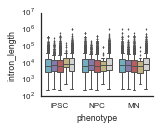

In [45]:
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.yscale('log')
sns.boxplot(data=modalities_intron_length, y=col, linewidth=1, fliersize=2, **plot_kws)
ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
sns.despine()
fig.savefig('{}/{}_boxplots.pdf'.format(figure_folder, col))